In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c, epsilon_0;
eps0 = epsilon_0;
import sys;
sys.path.insert(0, "../python/");
sys.path.insert(0, "transverse_resolution/");
sys.path.insert(0, "..\\python\\");
sys.path.insert(0, "transverse_Resolution\\");
from crystal import crystal;
from ebeam import ebeam;
from laser import laser;
import phase_retard as pr;
from plotting import makefig;
import vertical_resolution as vr;
import thz;

In [2]:
# Beam parameters
Q_drive = 1.5e-9;
Q_wit   = 0.5e-9;
sigz    = 5.2e-6;
sigt    = sigz/c;
dt      = sigt/10;
N       = 8000;
t_beam  = np.linspace(-N * dt / 2, N * dt / 2, N);
drive   = ebeam({'Q' : Q_drive, 'sigz' : sigz, 'del_z' : 0, 't' : t_beam});
wit     = ebeam({'Q' : Q_wit, 'sigz' : sigz, 'del_z' : 150e-6, 't' : t_beam});

# Crystal parameters
ctype = 'GaP';
d     = 100e-6;
x     = 1e-2;
x0    = [1e-3, 1e-3];
dx    = 3.5e-6;
nx    = int(x / dx);
y     = 1e-2;
y0    = [0, 0];
dy    = 3.5e-6;
ny    = int(y / dy);
y_arr = np.linspace(-y/2, y/2, ny);
x_arr = np.linspace(0, x, nx);
# Probe parameters
lambda0 = 800e-9;
dy      = 27e-9;
tp      = 30e-15;
probe   = laser({'y0' : lambda0, 'dy' : dy, 'tp' : tp});
psi     = 15;
td      = 0.0e-12;

In [3]:
gamma_drive, gamma_wit, gamma = vr.get_2D_signal(drive, wit, probe, psi, ctype, d, \
                                                x0, x, y0, y, td, nx, ny);

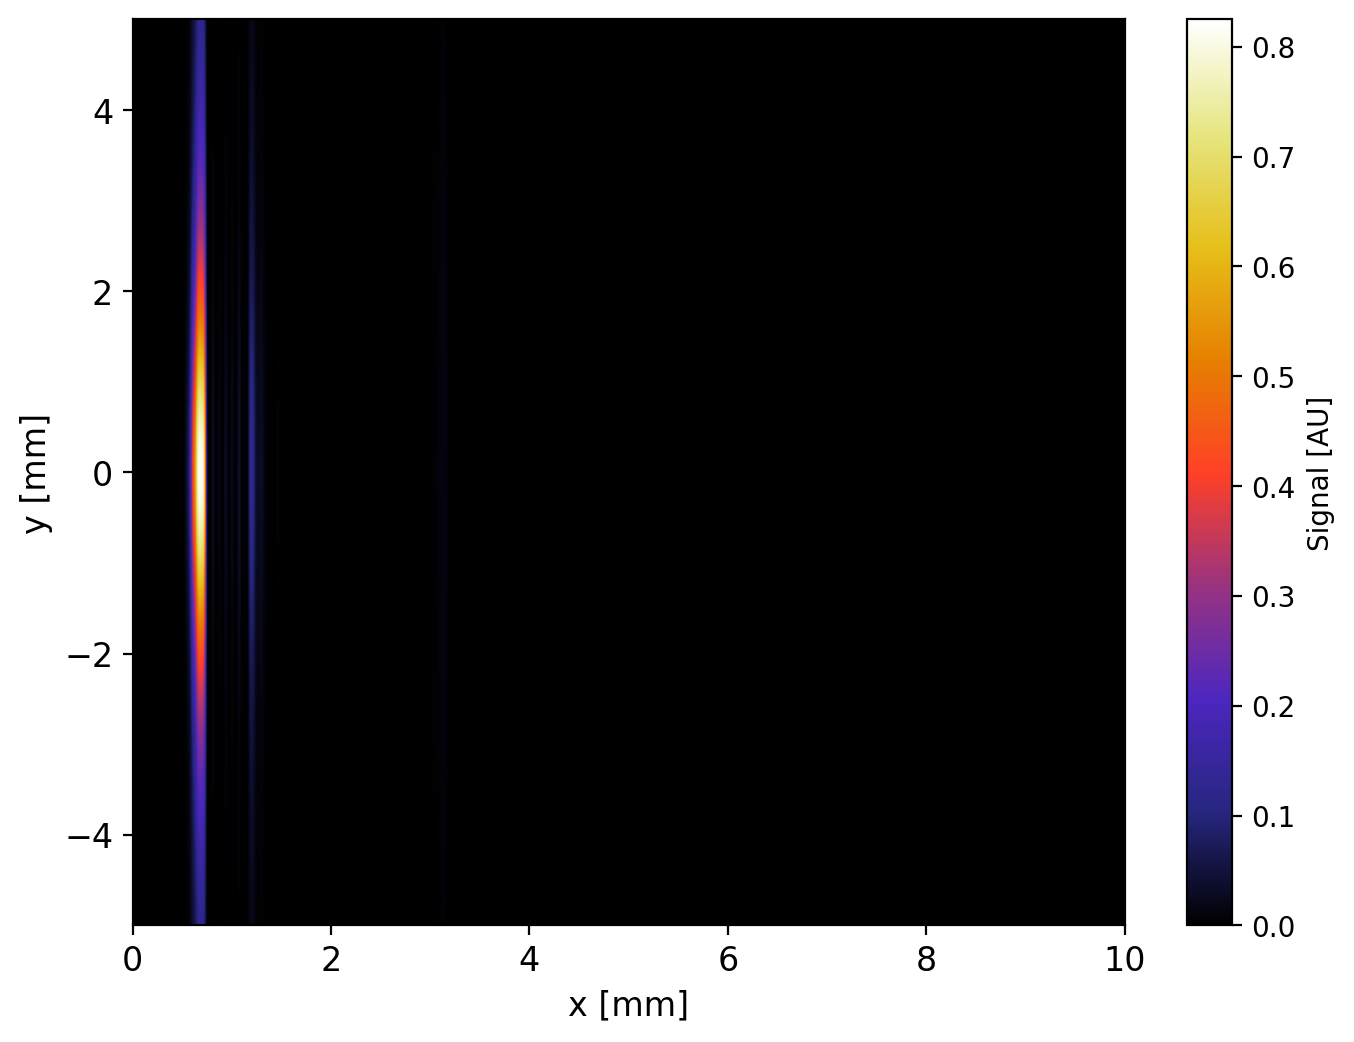

In [4]:
sig = np.sin(gamma / 2)**2;
ext = np.array([min(x_arr), max(x_arr), min(y_arr), max(y_arr)]) * 1e3;
vr.plot_2D_sig(sig, ext);

1 of 6
603.9915398090355
2 of 6
607.1210296526057
3 of 6
613.3800093397459
4 of 6
616.5094991833162
5 of 6
622.7684788704563
6 of 6
629.0274585575966


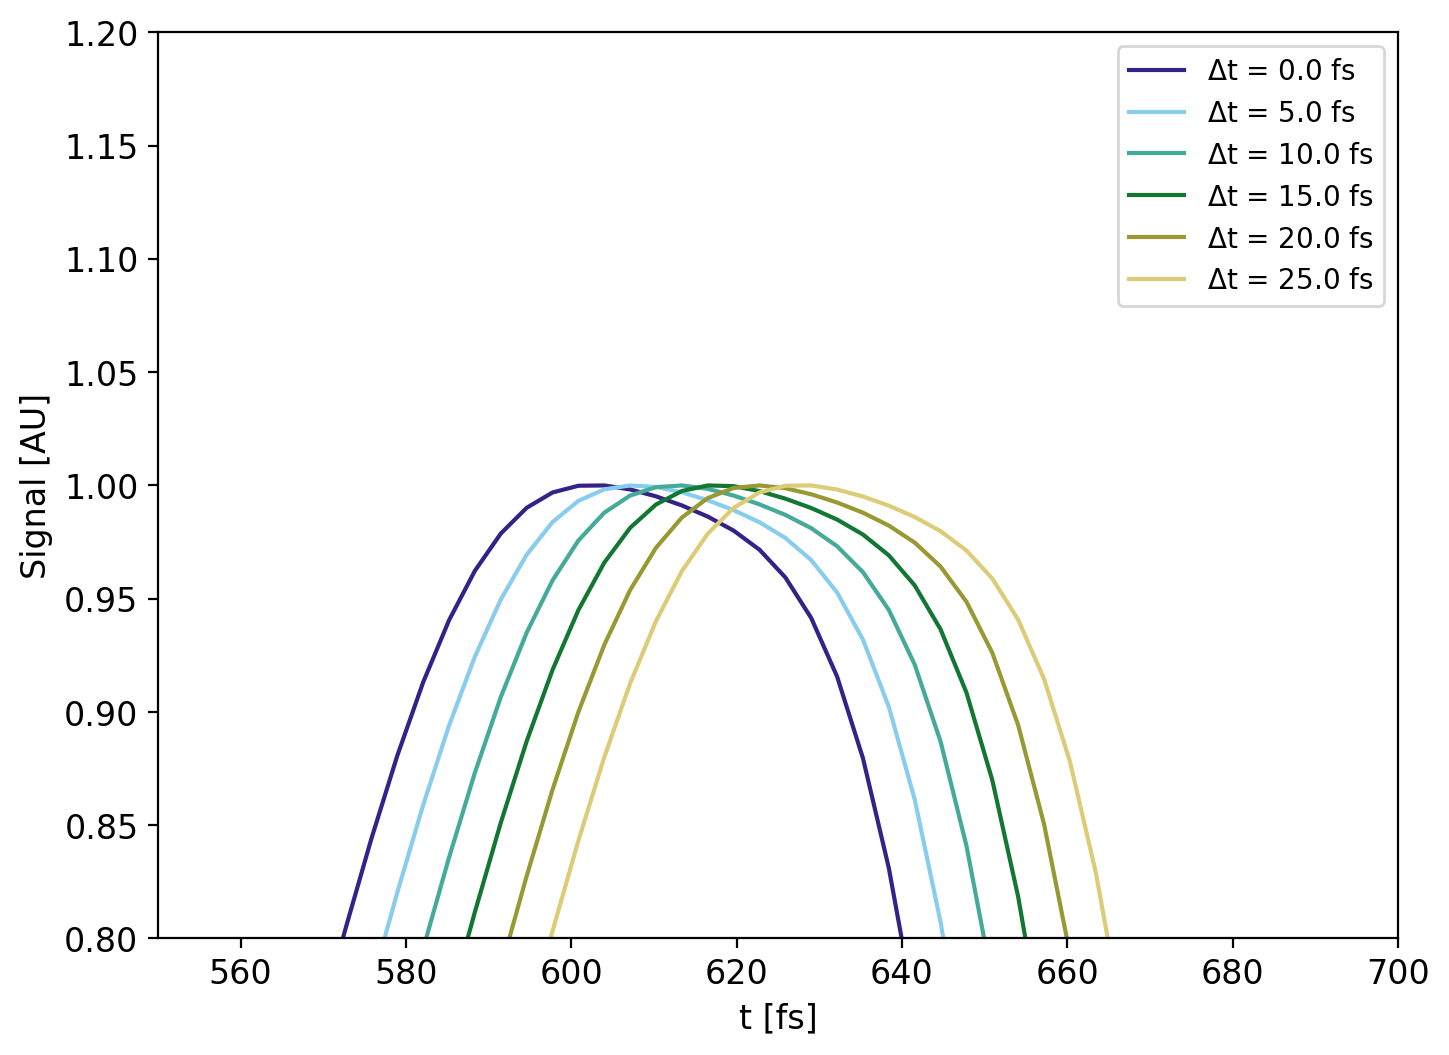

In [7]:
dt = np.array([0, 5, 10, 15, 20, 25]) * -1e-15;
fig, ax = makefig(x = 8, y = 6, xlab = 't [fs]', ylab = 'Signal [AU]');
t_plot = x_arr / c * np.tan(psi * np.pi / 180);
for i in range(len(dt)):
    print(i+1, "of", len(dt));
    lab = r'$\Delta$t = ' + str(np.round(abs(dt[i] * 1e15))) + " fs";
    t_delay = td + dt[i];
    dummy, dummy, gamma = vr.get_2D_signal(drive, wit, probe, psi, ctype, d, \
                                          x0, x, y0, y, t_delay, nx, ny);
    sig = np.sin(gamma / 2)**2;
    sig_plot = vr.integrate_1D(sig, x_arr, y_arr, 1, 5);
    sig_plot = sig_plot / max(sig_plot);
    ax.plot(t_plot * 1e15, sig_plot, label = lab);
    print(t_plot[np.argmax(sig_plot)] * 1e15)
ax.set_xlim([550, 700]);
ax.set_ylim([0.8, 1.2]);
ax.legend();
plt.show();